In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../data/CICIDS2017/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")

In [3]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.0,0.0,...,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.0,0.0,...,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN


In [4]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

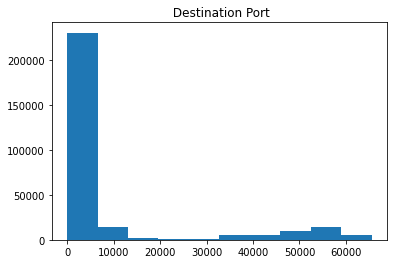

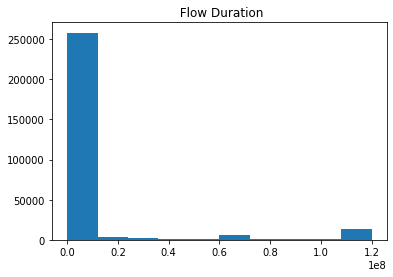

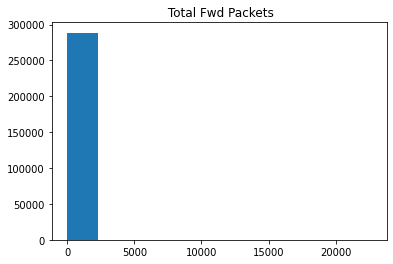

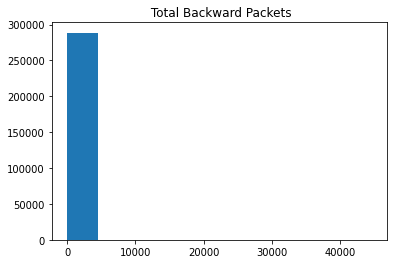

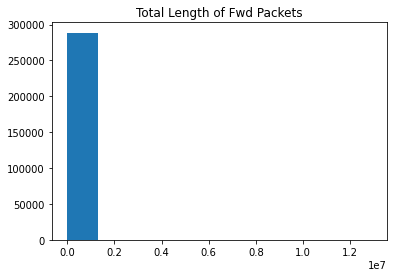

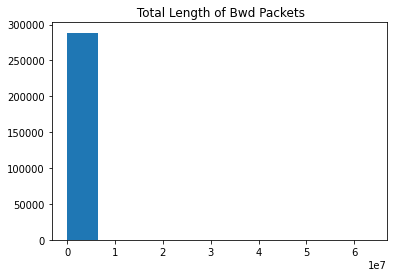

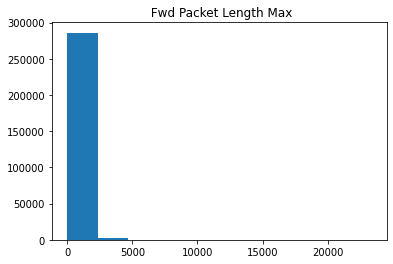

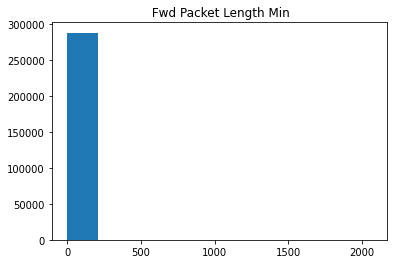

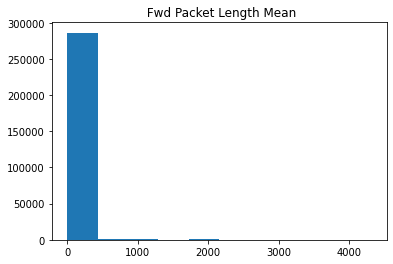

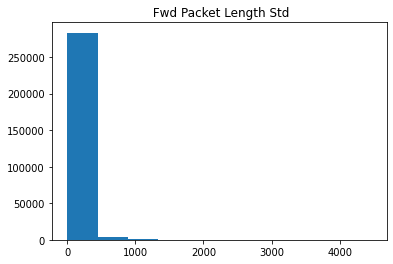

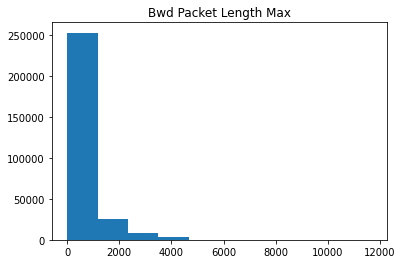

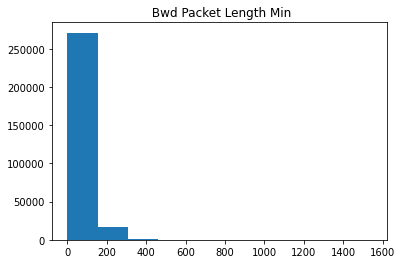

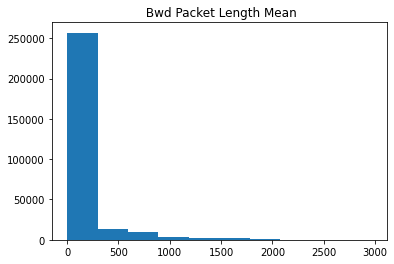

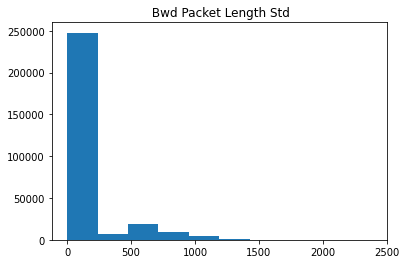

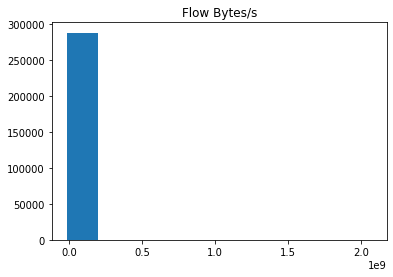

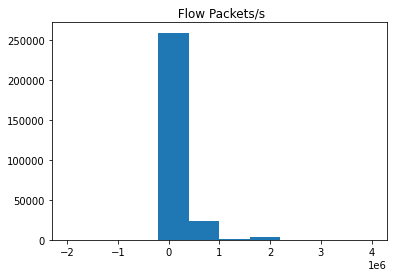

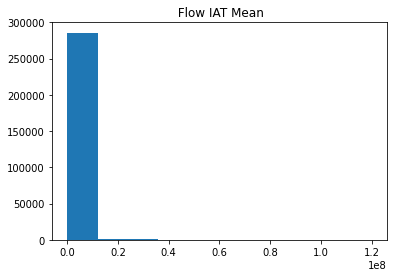

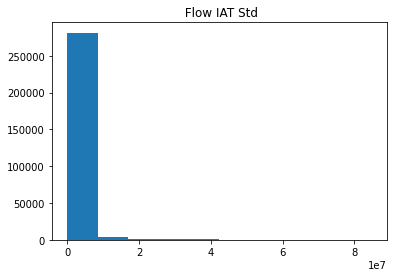

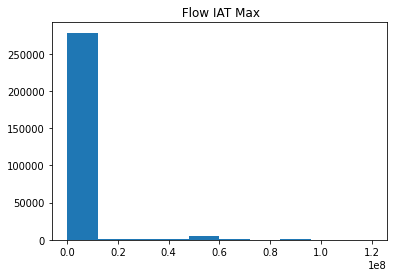

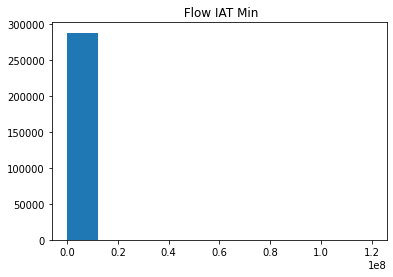

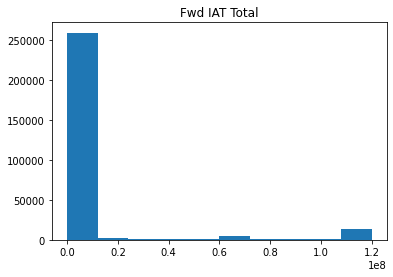

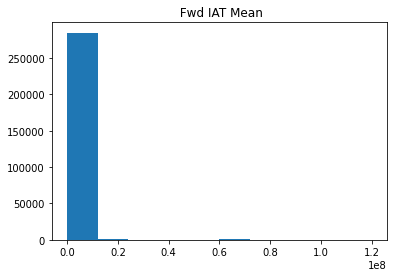

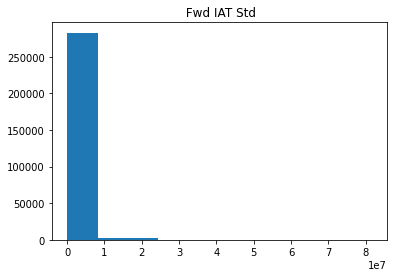

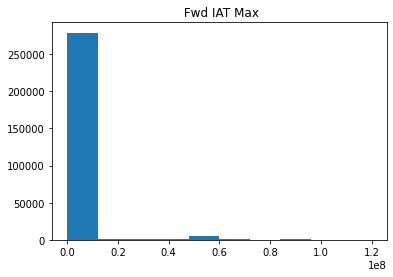

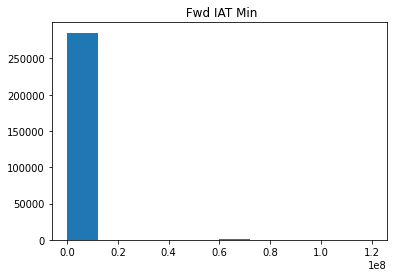

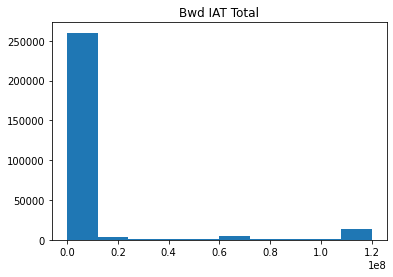

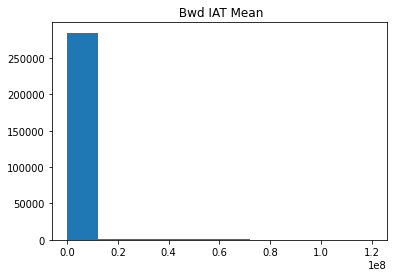

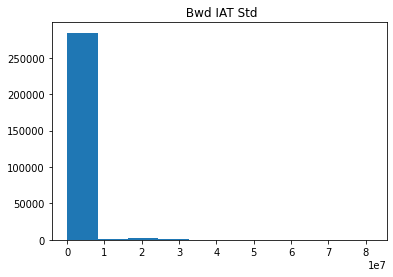

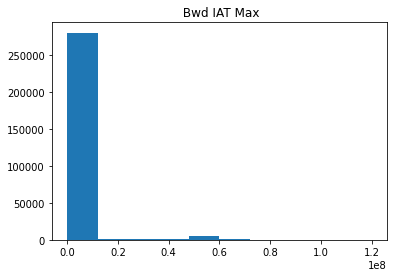

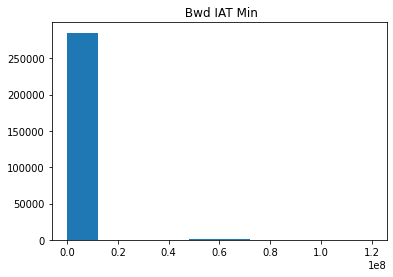

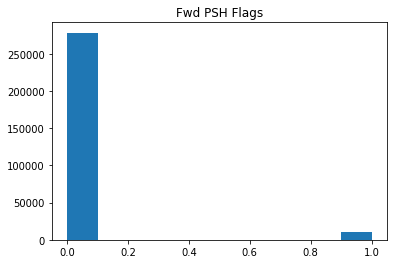

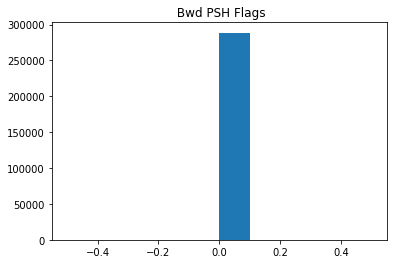

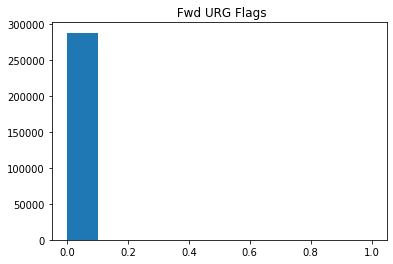

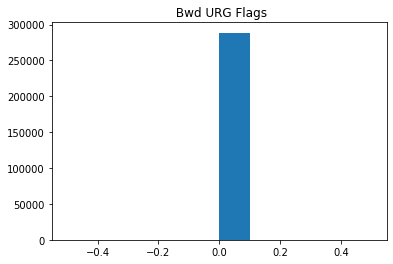

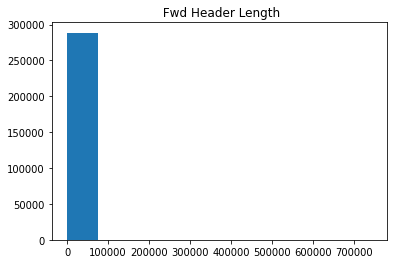

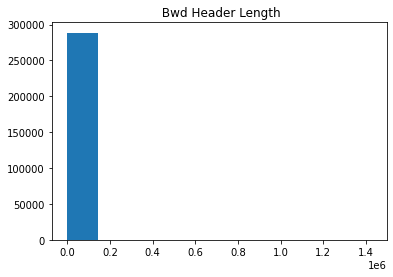

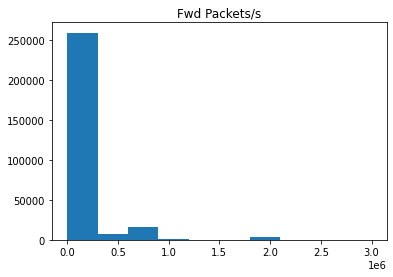

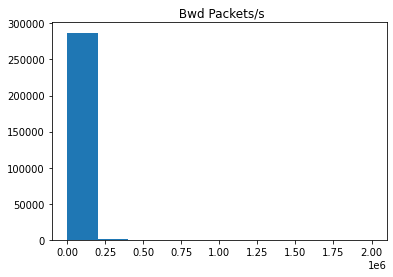

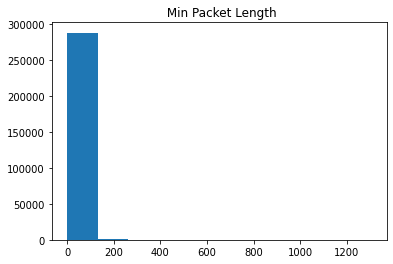

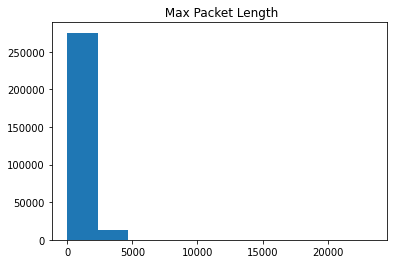

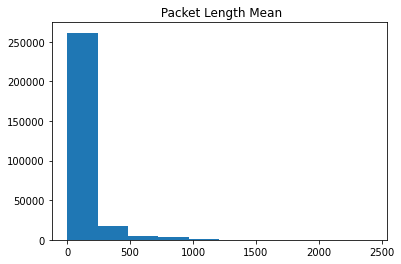

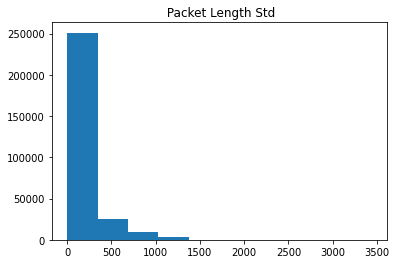

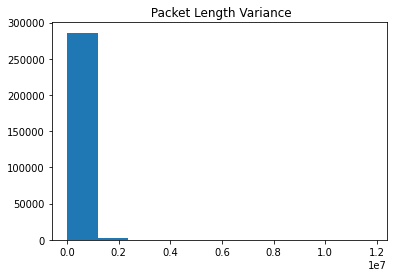

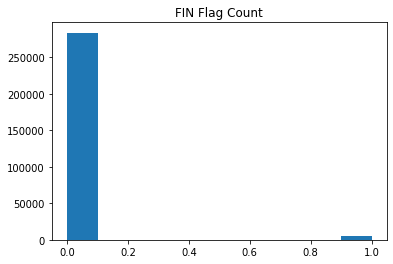

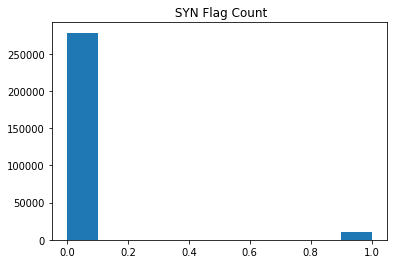

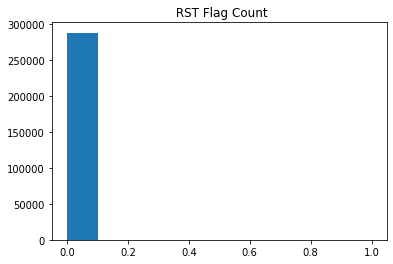

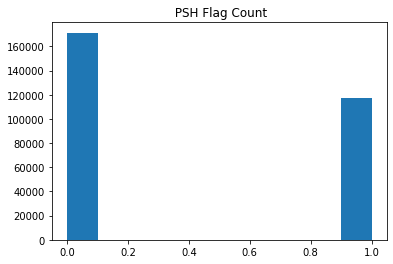

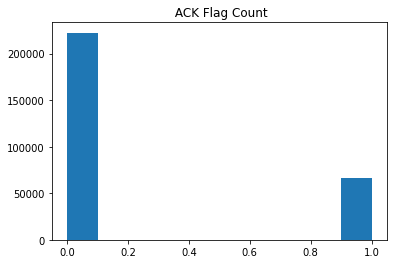

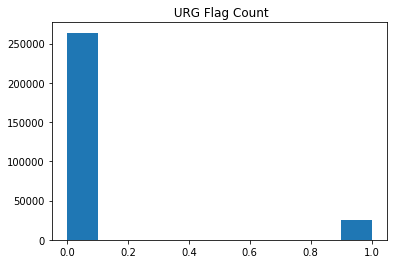

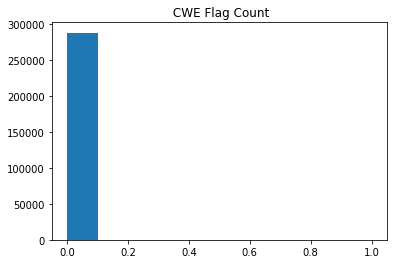

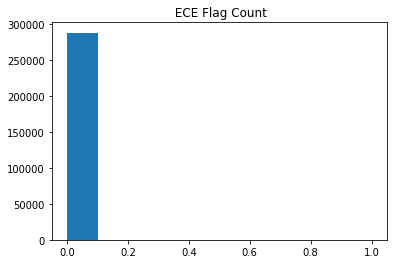

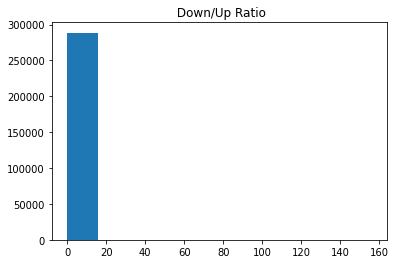

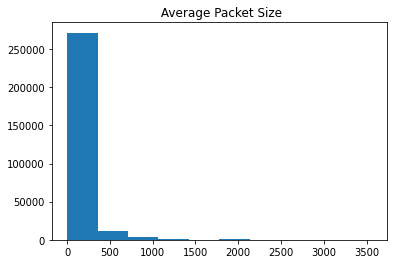

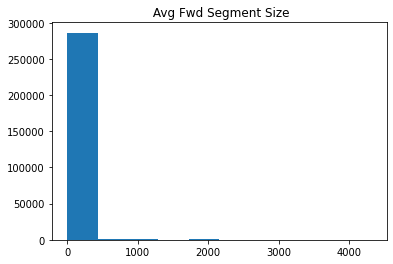

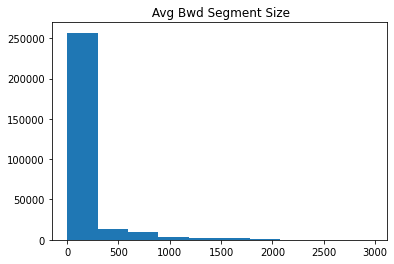

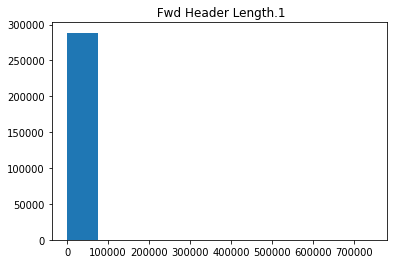

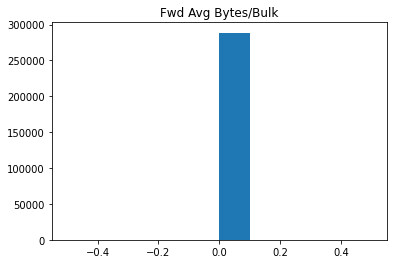

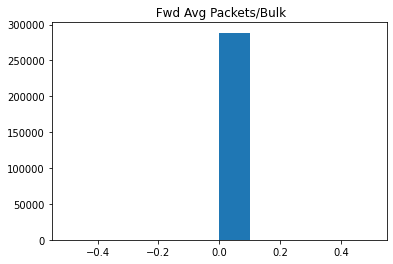

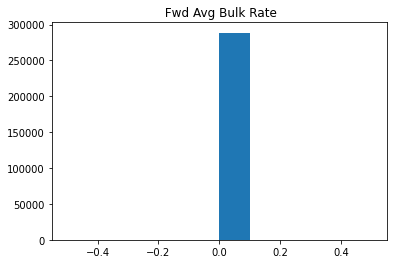

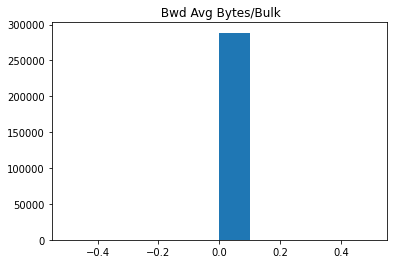

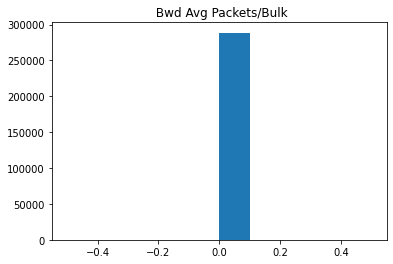

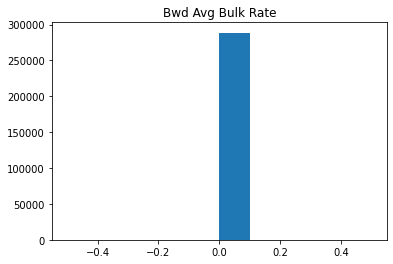

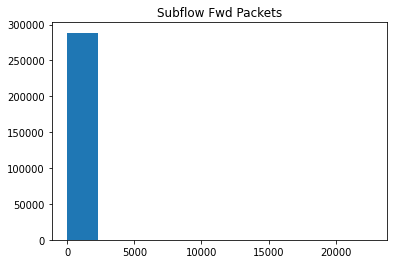

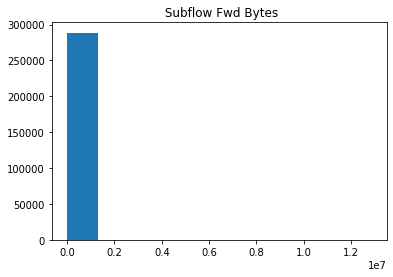

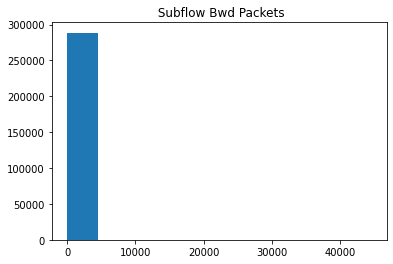

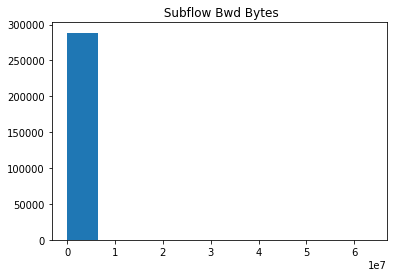

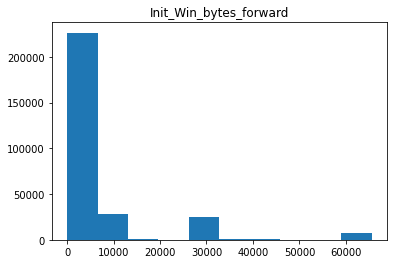

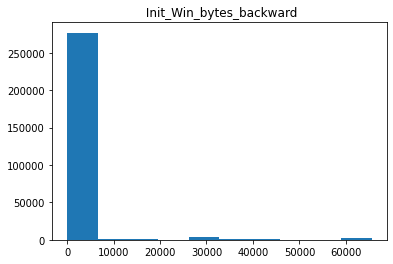

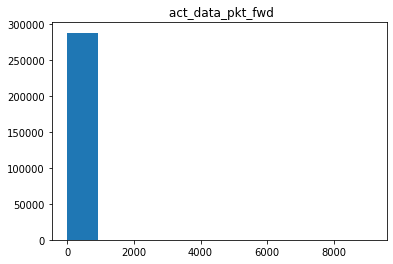

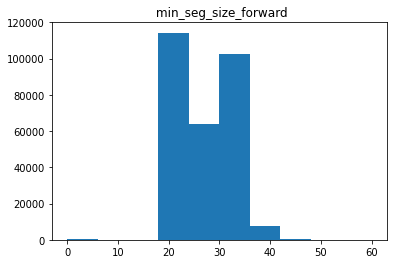

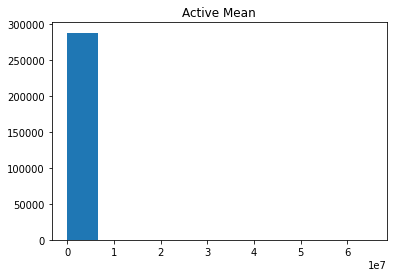

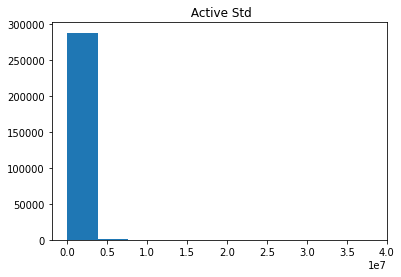

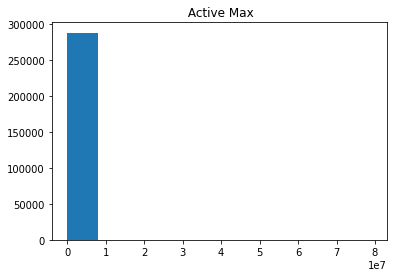

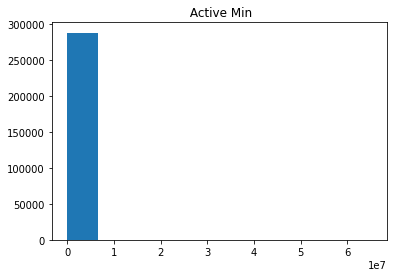

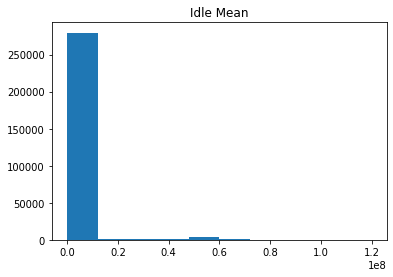

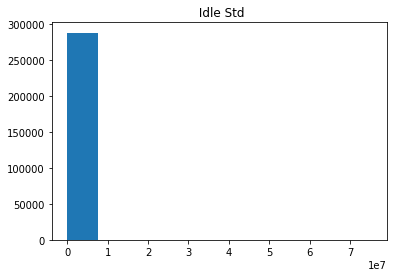

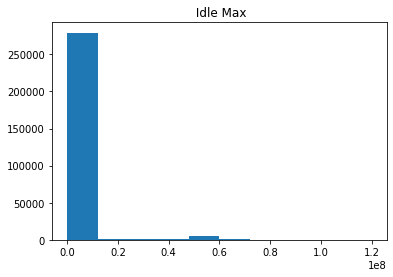

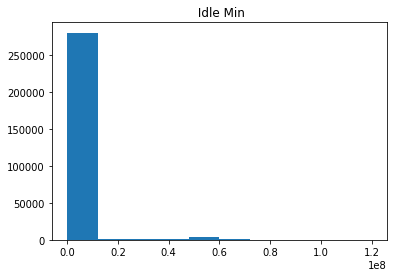

In [4]:
for colname in df.columns:
    col = df[colname]
#     print(colname, col.dtypes)
    if col.dtypes in ['int64','float64']:
#         print(len(col)-sum(np.isfinite(col)), sum(pd.isna(col)), sum(pd.isnull(col)),
#               max(col[np.isfinite(col)]), min(col[np.isfinite(col)]),len(col.unique()))
        plt.title(colname)
        plt.hist(col[np.isfinite(col)])
        plt.show()

In [5]:
for colname in df.columns:
    col = df[colname]
#     print(colname, col.dtypes)
    if col.dtypes in ['int64','float64']:
        print(col.dtypes,len(col)-sum(np.isfinite(col)), sum(pd.isna(col)), sum(pd.isnull(col)),
              max(col[np.isfinite(col)]), min(col[np.isfinite(col)]),len(col.unique()))

int64 0 0 0 65533 0 24688
int64 0 0 0 119999936 -2 104921
int64 0 0 0 22673 1 551
int64 0 0 0 44553 0 678
int64 0 0 0 12900000 0 6841
int64 0 0 0 63600000 0 16391
int64 0 0 0 23360 0 3046
int64 0 0 0 2065 0 156
float64 0 0 0 4317.097561 0.0 19496
float64 0 0 0 4467.11346 0.0 30071
int64 0 0 0 11680 0 3170
int64 0 0 0 1543 0 368
float64 0 0 0 2966.952381 0.0 25195
float64 0 0 0 2380.9944 0.0 30670
float64 207 18 18 2070000000.0 -12000000.0 143975
float64 207 0 0 4000000.0 -2000000.0 113401
float64 0 0 0 120000000.0 -2.0 112223
float64 0 0 0 84800000.0 0.0 100121
int64 0 0 0 120000000 -2 74325
int64 0 0 0 120000000 -12 26798
int64 0 0 0 120000000 0 45770
float64 0 0 0 120000000.0 0.0 73255
float64 0 0 0 81600000.0 0.0 65126
int64 0 0 0 120000000 0 45899
int64 0 0 0 120000000 0 17929
int64 0 0 0 120000000 0 26925
float64 0 0 0 120000000.0 0.0 53466
float64 0 0 0 81600000.0 0.0 49876
int64 0 0 0 120000000 0 27515
int64 0 0 0 120000000 0 8321
int64 0 0 0 1 0 2
int64 0 0 0 0 0 1
int64 0 0 0 

In [6]:
labels = df[' Label'].unique()
lb_count = []
for lb in labels:
    lb_count.append(sum(df[' Label']==lb))
    print(sum(df[' Label']==lb))

288566
36


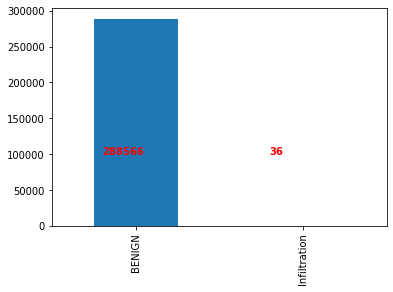

In [7]:
ax = df[' Label'].value_counts().plot(kind='bar')
for i in range(len(labels)):
    ax.text(i-0.2,100000, str(lb_count[i]), color='red', fontweight='bold')

In [8]:
print(labels)

['BENIGN' 'Infiltration']
